# Assess whether the model is spun up

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.stats as scs

##### Parameters:

In [2]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

isize = imax - imin
jsize = jmax - jmin

year  = 2002
month = 8

stn_i = np.array([104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629])
stn_j = np.array([370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471])

In [4]:
initial = '/data/brogalla/IC/Mn_ini_20180716.nc'
end_yr1 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up0/'
end_yr2 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up1/'
end_yr3 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up2/'
end_yr4 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up3/'
end_yr5 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up4/'
end_yr6 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up5/'
end_yr7 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up6/'
end_yr8 = '/data/brogalla/run_storage/Mn-set2-202004/ref-spin-up7/'
monthly =  'ANHA12_EXH006_2002_monthly.nc'

In [5]:
colors = ['#f9ddd8', '#f2ac9f', '#ea7a65', '#e5593f', '#a03e2c', \
          '#e0dfea', '#b1b0cc', '#646199', '#46436b', \
          '#3d6977', '#5b9db3', '#84bfd2', '#c1dfe8'] # CB

name   = ['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
          'CB1', 'CB2', 'CB3', 'CB4']

##### Load files:

In [7]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[:,:,:,:]

In [8]:
ref   = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12-EXH006_y2015m01d05_gridT.nc',  'r')
depth = np.array(ref.variables['deptht'])

In [22]:
mn_ini  = load_file(initial, ini=True)
mn_end1 = load_file(end_yr1 + monthly)
mn_end2 = load_file(end_yr2 + monthly)
mn_end3 = load_file(end_yr3 + monthly)
mn_end4 = load_file(end_yr4 + monthly)

##### Calculations:

In [11]:
mn_m0     = nc.Dataset(initial)
mn_m1     = nc.Dataset(end_yr1 + monthly)
mn_m2     = nc.Dataset(end_yr2 + monthly)
mn_m3     = nc.Dataset(end_yr3 + monthly)
mn_m4     = nc.Dataset(end_yr4 + monthly)
mn_m5     = nc.Dataset(end_yr5 + monthly)
mn_m6     = nc.Dataset(end_yr6 + monthly)
mn_m7     = nc.Dataset(end_yr7 + monthly)
mn_m8     = nc.Dataset(end_yr8 + monthly)

In [14]:
mn_month1 = np.array(mn_m1.variables['dissolmn'][:,0,:,:,:])
mn_month2 = np.array(mn_m2.variables['dissolmn'][:,0,:,:,:])
mn_month3 = np.array(mn_m3.variables['dissolmn'][:,0,:,:,:])
mn_month4 = np.array(mn_m4.variables['dissolmn'][:,0,:,:,:])
mn_month5 = np.array(mn_m5.variables['dissolmn'][:,0,:,:,:])
mn_month6 = np.array(mn_m6.variables['dissolmn'][:,0,:,:,:])
mn_month7 = np.array(mn_m7.variables['dissolmn'][:,0,:,:,:])
mn_month8 = np.array(mn_m8.variables['dissolmn'][:,0,:,:,:])

The year-to-year change is calculated as the sum over all depths of the concentration at the observed stations, $stn$, for each month from one year compared to the previous year. 

$$ diff_{stn} = \sum^{50}_{z=0} | Mn_{stn}(z,month,yr) - Mn_{stn}(z,month,yr-1) | $$

In [15]:
diff1 = np.array([np.sum(np.abs(mn_month2[:,:,i,j]-mn_month1[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff2 = np.array([np.sum(np.abs(mn_month3[:,:,i,j]-mn_month2[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff3 = np.array([np.sum(np.abs(mn_month4[:,:,i,j]-mn_month3[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff4 = np.array([np.sum(np.abs(mn_month5[:,:,i,j]-mn_month4[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff5 = np.array([np.sum(np.abs(mn_month6[:,:,i,j]-mn_month5[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff6 = np.array([np.sum(np.abs(mn_month7[:,:,i,j]-mn_month6[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff7 = np.array([np.sum(np.abs(mn_month8[:,:,i,j]-mn_month7[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])

##### Figures:

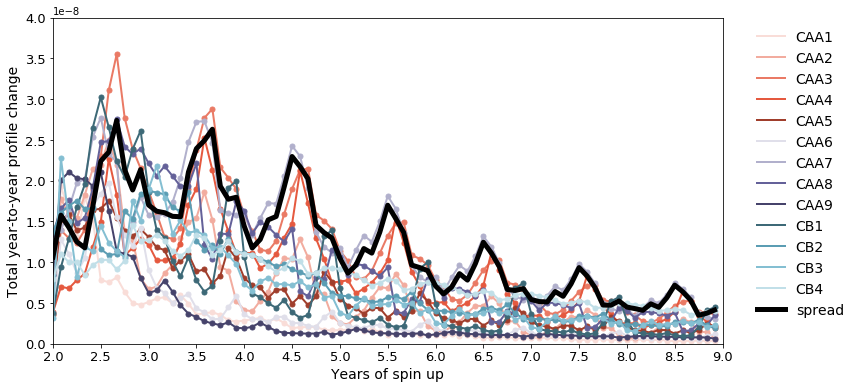

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

nruns  = 7 # number of runs
months = range(12 +1, 12*nruns +1)
years  = np.linspace(2, 2+nruns, nruns*12 + 1)[0:-1]
differences = np.empty((len(name),len(years)))

for stn in range(0,len(name)):
    differences[stn,:] = np.concatenate([diff1[stn,:], diff2[stn,:], diff3[stn,:], diff4[stn,:], \
                                         diff5[stn,:], diff6[stn,:], diff7[stn,:]])
    ax.plot(years, differences[stn,:], c=colors[stn], label=name[stn], linewidth=2)
    ax.plot(years, differences[stn,:], '.', c=colors[stn], markersize=10)
    
# Line for spread in values
ax.plot(years, np.max(differences,axis=0)-np.min(differences,axis=0), '-k', linewidth=5, label='spread')

ax.set_xlim([2, 2+nruns])
ax.set_ylim([0, 4e-8])
ax.xaxis.set_ticks(np.linspace(2,2+nruns, nruns*2 + 1))
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xlabel('Years of spin up', fontsize=14)
ax.set_ylabel('Total year-to-year profile change', fontsize=14)
ax.legend(bbox_to_anchor=(1.2, 1.00), fontsize=14, frameon=False)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Mn_spin-up-reference-20190917.png', bbox_inches='tight')